Task 4 Sales prediction

In [1]:
# import the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the dataset into pandas dataframe
ad_exp_d = pd.read_csv(r"T:\codsoft\Codsoft_task-4-main\sales.csv")

Data inspection

In [4]:
ad_exp_d.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
ad_exp_d.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
ad_exp_d.shape

(200, 4)

In [7]:
ad_exp_d.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data preprocessing

In [8]:
# check for null values
ad_exp_d.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

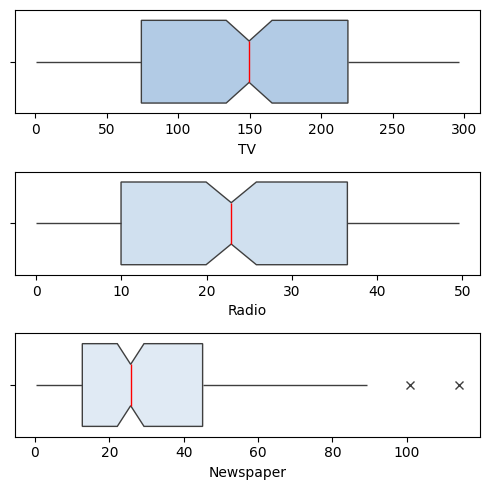

In [9]:
# detecting outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x = ad_exp_d['TV'], ax=axs[0], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "red"})
plt2 = sns.boxplot(x = ad_exp_d['Radio'],ax=axs[1], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .3)},
    medianprops={"color": "red"})
plt3 = sns.boxplot(x = ad_exp_d['Newspaper'],ax=axs[2], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .2)},
    medianprops={"color": "red"})

plt.tight_layout()


In [10]:
# we see their are no significant outliers present in the data

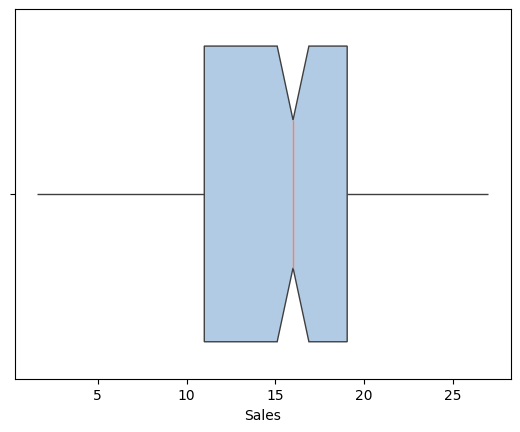

In [11]:
# target variable
sns.boxplot(x= ad_exp_d['Sales'],  notch = True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.show()

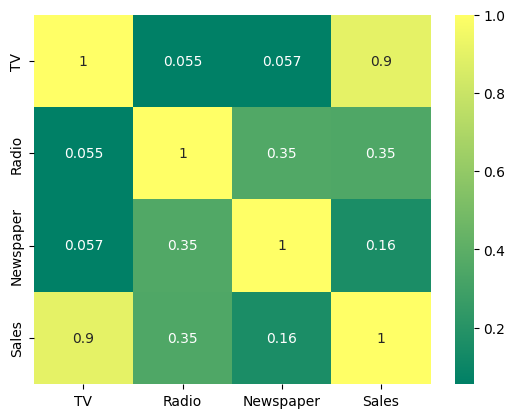

In [12]:
# visualize correlation of our target variable with other features
corr = ad_exp_d.corr()
sns.heatmap(corr, annot= True, cmap = 'summer')
plt.show()

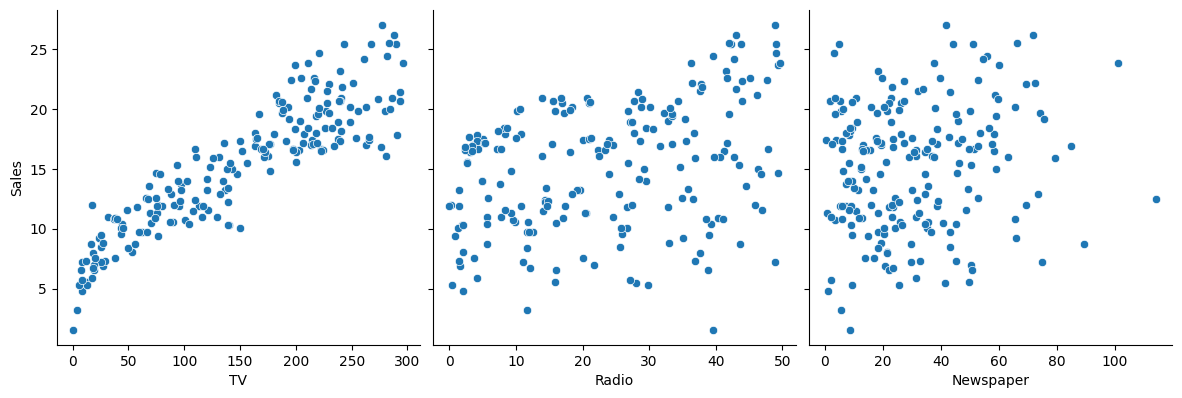

In [13]:
# use scatterplot to see how sales is relaated to the other variables 
sns.pairplot(ad_exp_d, x_vars = ['TV','Radio','Newspaper'], y_vars=['Sales'], kind = 'scatter', aspect = 1, height = 4)

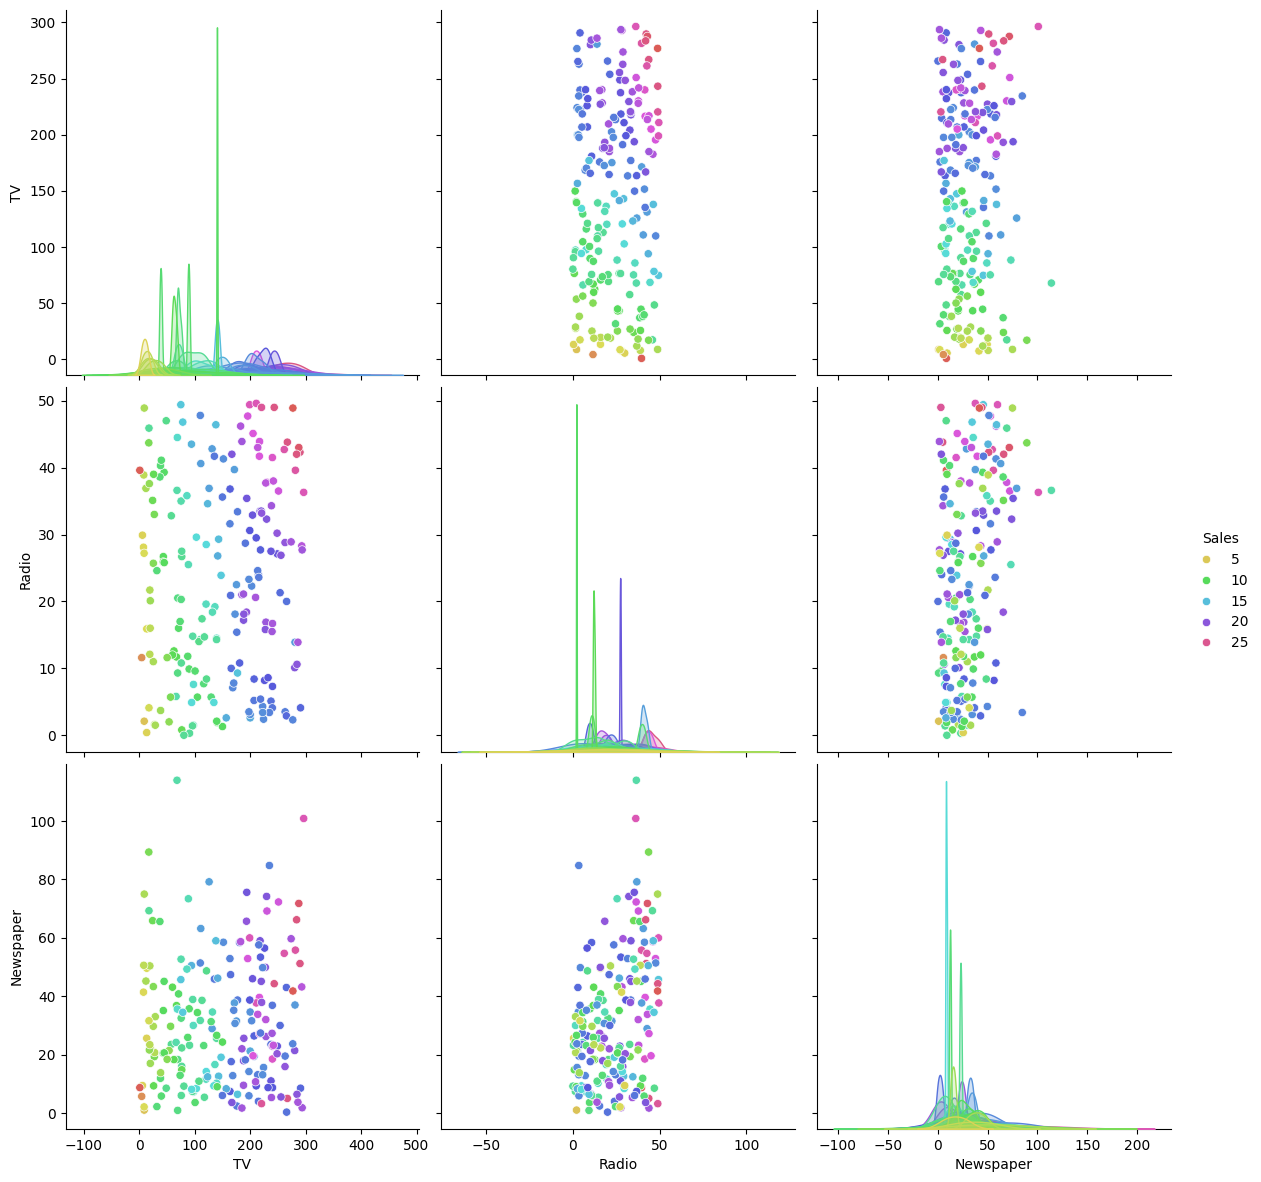

In [14]:
sns.pairplot(ad_exp_d, kind = 'scatter', aspect = 1, height = 4, palette = 'hls', hue='Sales')

Now, as clearly comprehensible through the above visualizations, the expenditure on the advertisement of TV has the most positive effect on the target(sales) variable

Model Building: 

In order to predict the sales, we will implement simple linear regression to build our model using TV as our feature variable

Equation of linear regression: y = c + m1.x1 + m2.x2 + ... + mn.xn where, y = target variable c = intercept m1, m2, ..., mn are the weights corresponding to x1, x2,..., xn features

In [16]:
# our linear equation would be of the form : y = c + m.x, where we know x = TV and y = Sales and our task is to find most apt value for m, the model coefficient

Let's separate the feature and target variables

In [17]:
x = ad_exp_d['TV']
y = ad_exp_d['Sales']

now separate the dataset into trainig and testing data

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 120)

In [19]:
print(x_train.head())
print(y_train.head())

111    241.7
156     93.9
140     73.4
171    164.5
157    149.8
Name: TV, dtype: float64
111    21.8
156    15.3
140    10.9
171    17.5
157    10.1
Name: Sales, dtype: float64


In [20]:
# building a linear model using statsmodels.api library

In [22]:
import statsmodels.api as sm

In [23]:
# get constant and the intercept
x_train_sm = sm.add_constant(x_train)

In [24]:
# fit the regression line using OLS
lr = sm.OLS(y_train, x_train_sm).fit()

In [25]:
lr.params

const    6.573326
TV       0.058614
dtype: float64

In [26]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     606.9
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           2.24e-52
Time:                        03:13:04   Log-Likelihood:                -317.66
No. Observations:                 140   AIC:                             639.3
Df Residuals:                     138   BIC:                             645.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5733      0.396     16.582      0.0

In [27]:
# we see various attributes of our regression analysis
# the value of coefficient is 0.058 and that of constant is 6.57
# F-statistic has a low p value, meaning that model is statistically significant
# R-squared value is around 0.815 which says 81% of the sales is described by TV

therefore Sales = 6.57 + 0.058*TV

Let's see how well our model fits

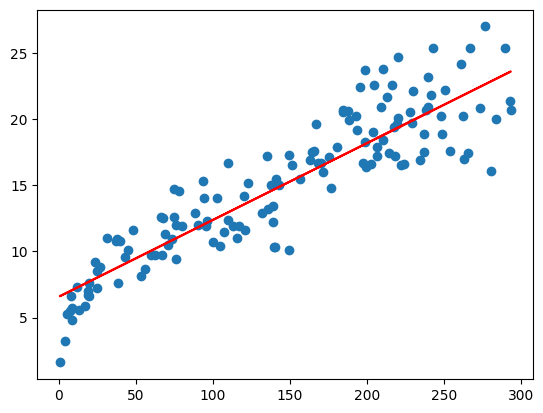

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [28]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.57 + 0.058*x_train, 'r')
plt.show()
plt.figure(figsize=(20,20))

Residual analysis

In [29]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

C:\Users\behra\AppData\Local\Temp\ipykernel_21192\1144122319.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15, color = 'green')


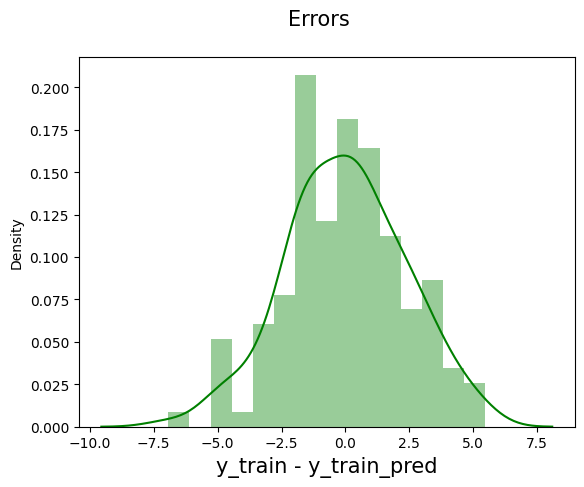

In [30]:
fig = plt.figure()
sns.distplot(res, bins = 15, color = 'green')
fig.suptitle('Errors', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

The residuals are normally distributed with 0 mean which is good for the model accuracy

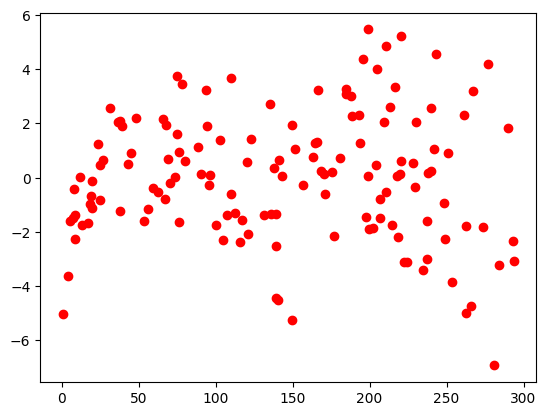

In [31]:
plt.scatter(x_train,res, c= 'red' )
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
# returns rmse for test set
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)
np.sqrt(mean_squared_error(y_test, y_pred))

2.207483005109358

In [37]:
# checking the r-squared on test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.7929926978839348

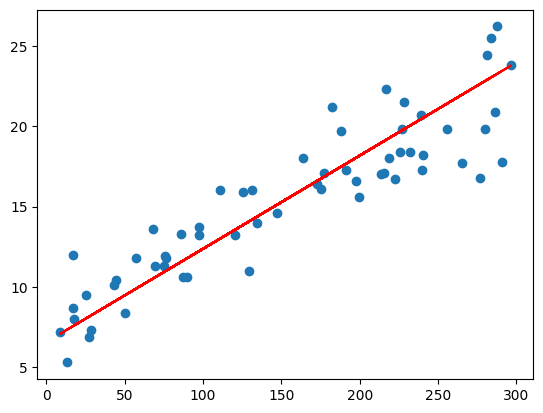

In [38]:
# visualizing the fit on the test set
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.57 + 0.058 * x_test, 'r')
plt.show()

In [39]:
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to x_test_sm
y_pred = lr.predict(x_test_sm)

In [40]:
y_pred.head()

87     13.061903
118    13.941114
80     11.051441
198    23.196275
62     20.599672
dtype: float64

Thank You.